<a href="https://colab.research.google.com/github/QABoahene/Stock-Price-Prediction-Using-LSTM/blob/master/STOCK_PRICE_PREDICTION_USING_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STOCK PRICE PREDICTION USING LONG SHORT-TERM MEMORY

Building a stock price prediction model with the NSE TATA GLOBAL dataset. Tata Global Beverages Limited has a dataset their beverages. The dataset is found here. https://data-flair.training/blogs/download-tata-global-beverages-stocks-data/

Long Short-Term Memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. - Wikipedia

In [0]:
#Importing Libraries
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

In [5]:
#This is to upload files from my local disk
uploaded = files.upload()

Saving NSE-Tata-Global-Beverages-Limited.csv to NSE-Tata-Global-Beverages-Limited (1).csv


In [8]:
stock_price = pd.read_csv(io.BytesIO(uploaded['NSE-Tata-Global-Beverages-Limited.csv']))
# Dataset is now stored in a Pandas Dataframe
stock_price.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [10]:
stock_price.shape

(1235, 8)

In [11]:
stock_price.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [12]:
stock_price.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [0]:
#Analysing the closing prices from the data
stock_price['Date'] = pd.to_datetime(stock_price.Date, format = '%Y-%m-%d')
stock_price.index = stock_price['Date']

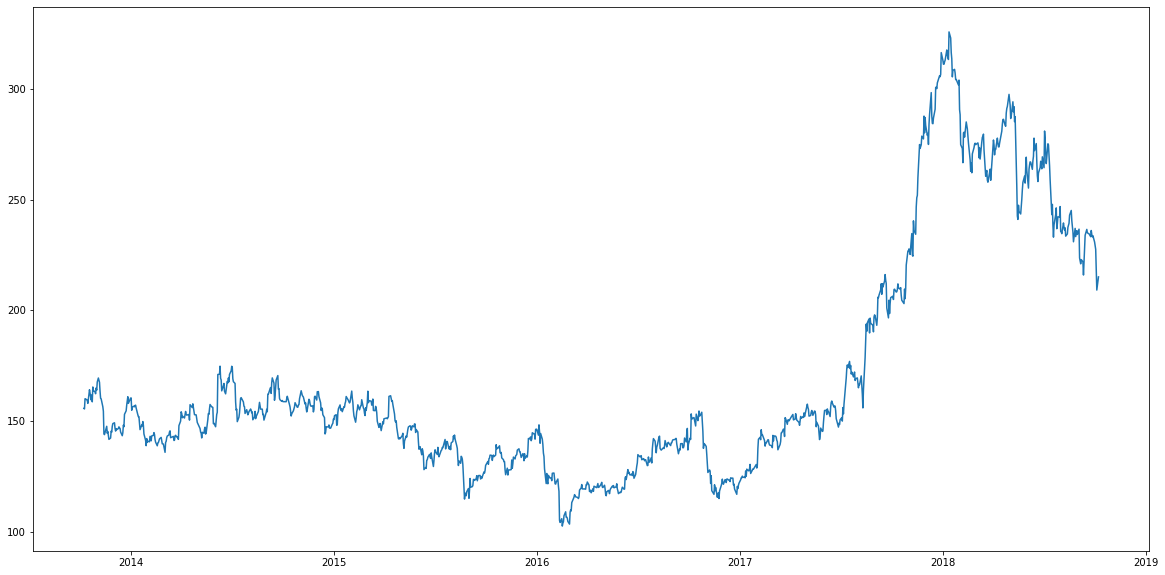

In [39]:
plt.figure(figsize=(20, 10))
plt.plot(stock_price['Close'], label = 'HISTORY OF CLOSE PRICE')

In [0]:
 stock_price2 = stock_price.sort_index(ascending=True, axis=0)
 stock_price3 = pd.DataFrame(index=range(0, len(stock_price2)), columns = ['Date', 'Close'])

 for i in range(0, len(stock_price2)):
   stock_price3['Date'][i] = stock_price2['Date'][i]
   stock_price3['Close'][i] = stock_price2['Close'][i]

In [45]:
stock_price3.head()

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45


In [46]:
scaler = MinMaxScaler(feature_range=(0,1))
final_stock_price = stock_price3.values

train_data = final_stock_price[0:987,:]
test_data = final_stock_price[987:,:]

stock_price3.index=stock_price3.Date
stock_price3.drop('Date', axis=1, inplace=True)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_stock_price)

x_train_data, y_train_data = [],[]

for i in range(60, len(train_data)):
  x_train_data.append(scaled_data[i-60:i,0])
  y_train_data.append(scaled_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

x_train_data = np.reshape(x_train_data, (x_train_data.shape[0],x_train_data.shape[1],1))

AttributeError: ignored